<a href="https://colab.research.google.com/github/Janasya85/Datasciences/blob/main/WA_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
print ('JSGLP')

JSGLP


In [41]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DataScienceClass')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit
from sklearn.preprocessing import LabelEncoder


sns.set_palette('muted')

In [43]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [44]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [45]:
df_turnover = pd.read_csv('Turnover2.csv')
df_turnover.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [46]:
df_turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [47]:
df_turnover['Attrition'] = df_turnover['Attrition'].map({'Yes': 1, 'No': 0})

In [48]:
df_turnover.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [49]:
front = df_turnover['Attrition']
df_turnover.drop(labels=['Attrition'], axis=1,inplace = True)
df_turnover.insert(0, 'Attrition', front)
df_turnover.head(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [50]:
df_turnover.dtypes

,0
Attrition,int64
Age,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [51]:
df_turnover.isnull().any()

,0
Attrition,False
Age,False
BusinessTravel,False
DailyRate,False
Department,False
DistanceFromHome,False
Education,False
EducationField,False
EmployeeCount,False
EmployeeNumber,False


In [52]:
df_turnover.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [53]:
left_rate = df_turnover.Attrition.value_counts() / len(df_turnover)
left_rate

,count
Attrition,
0,0.838776
1,0.161224


In [54]:
left_summary = df_turnover.groupby('Attrition').mean(numeric_only=True)
left_summary.mean()

,0
Age,35.584414
DailyRate,781.433665
DistanceFromHome,9.774282
Education,2.883335
EmployeeCount,1.000000
EmployeeNumber,1019.001057
EnvironmentSatisfaction,2.617712
HourlyRate,65.762994
JobInvolvement,2.644733
JobLevel,1.891558


In [55]:
# Flatten the correlation matrix
flat_corr = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool))
flat_corr = flat_corr.stack().sort_values(ascending=False)

# Display top N pairs
top_n = 10
print("Top", top_n, "strongest correlations:\n")
print(flat_corr.head(top_n))

Top 10 strongest correlations:

JobLevel            MonthlyIncome              0.950300
                    TotalWorkingYears          0.782208
PercentSalaryHike   PerformanceRating          0.773550
MonthlyIncome       TotalWorkingYears          0.772893
YearsAtCompany      YearsWithCurrManager       0.769212
                    YearsInCurrentRole         0.758754
YearsInCurrentRole  YearsWithCurrManager       0.714365
Age                 TotalWorkingYears          0.680381
TotalWorkingYears   YearsAtCompany             0.628133
YearsAtCompany      YearsSinceLastPromotion    0.618409
dtype: float64


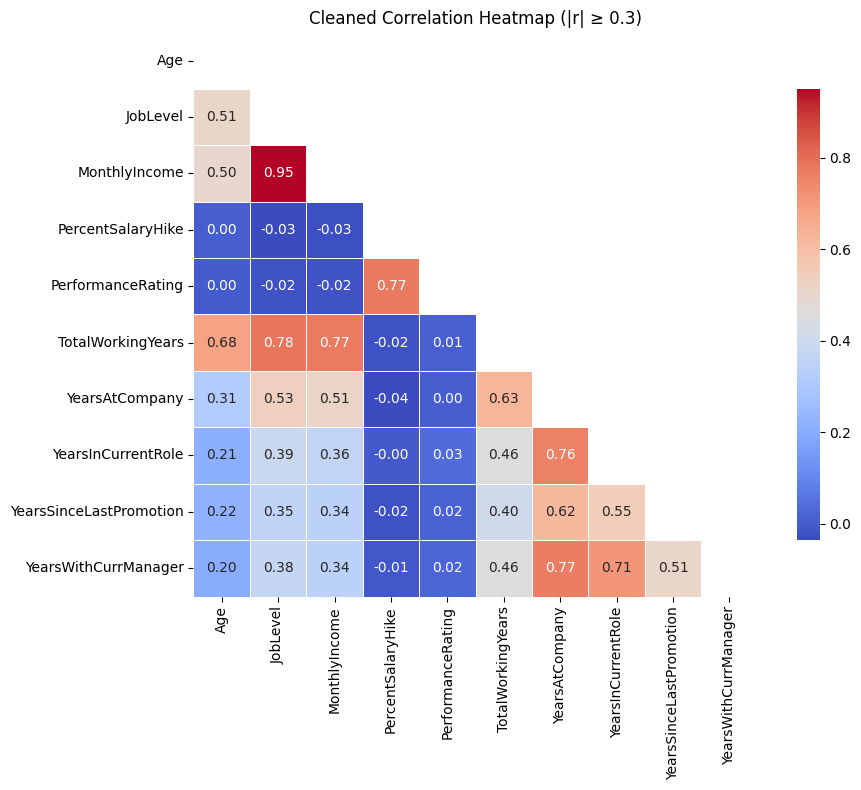

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numeric columns
numeric_df = df_turnover.select_dtypes(include='number')

# Step 2: Compute full correlation matrix
corr = numeric_df.corr()

# Step 3: Set a threshold
threshold = 0.3

# Step 4: Identify columns with at least one strong correlation (excluding self)
keep_cols = corr.columns[(corr.abs() > threshold).sum() > 1]  # more than just itself

# Step 5: Filter the correlation matrix to only include those columns
filtered_corr = corr.loc[keep_cols, keep_cols]

# Step 6: Create a mask for the upper triangle
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Step 7: Plot the clean heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, mask=mask, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title("Cleaned Correlation Heatmap (|r| ≥ 0.3)")
plt.tight_layout()
plt.show()


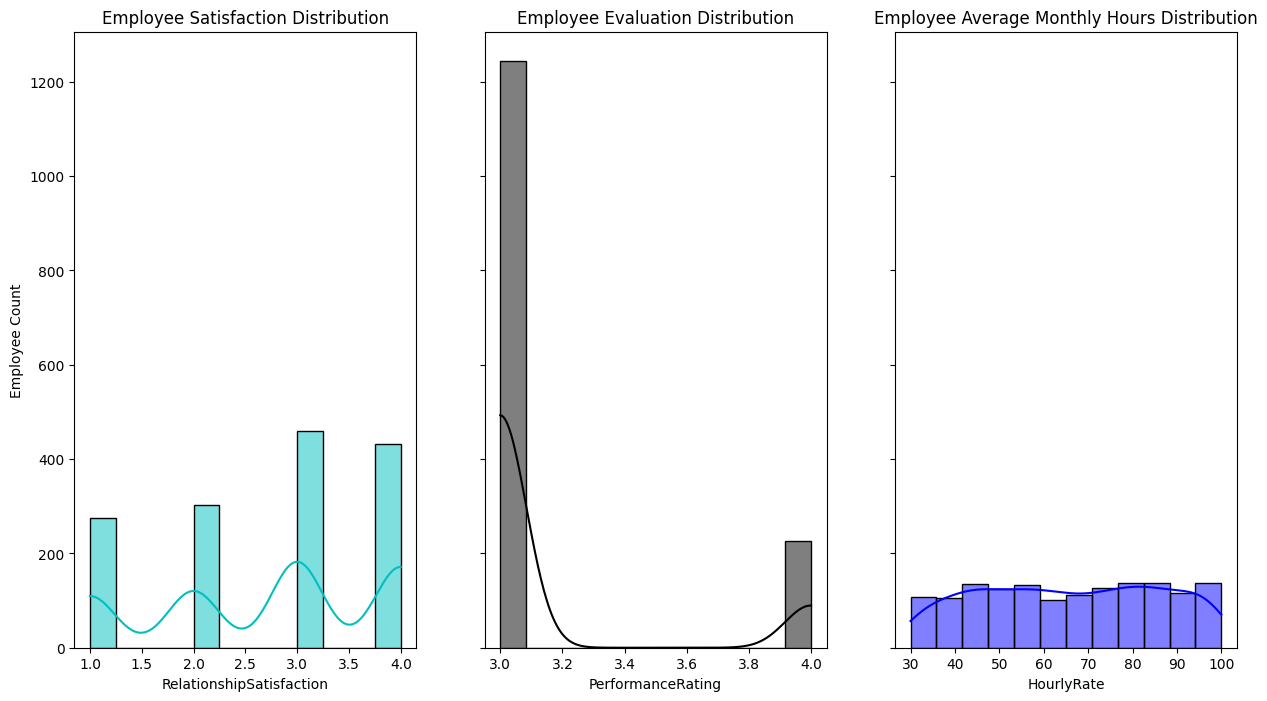

In [57]:
# Set up the matplotlib figure
fig, ax = plt.subplots(ncols=3, figsize=(15, 8), sharey=True)

# Graph Employee Satisfaction
sns.histplot(df_turnover.RelationshipSatisfaction, color='c', kde=True, ax=ax[0]).set_title('Employee Satisfaction Distribution')
ax[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.histplot(df_turnover.PerformanceRating, color='k', kde=True, ax=ax[1]).set_title('Employee Evaluation Distribution')

# Graph Employee Average Monthly Hours
sns.histplot(df_turnover.HourlyRate, color='b', kde=True, ax=ax[2]).set_title('Employee Average Monthly Hours Distribution')

plt.show()

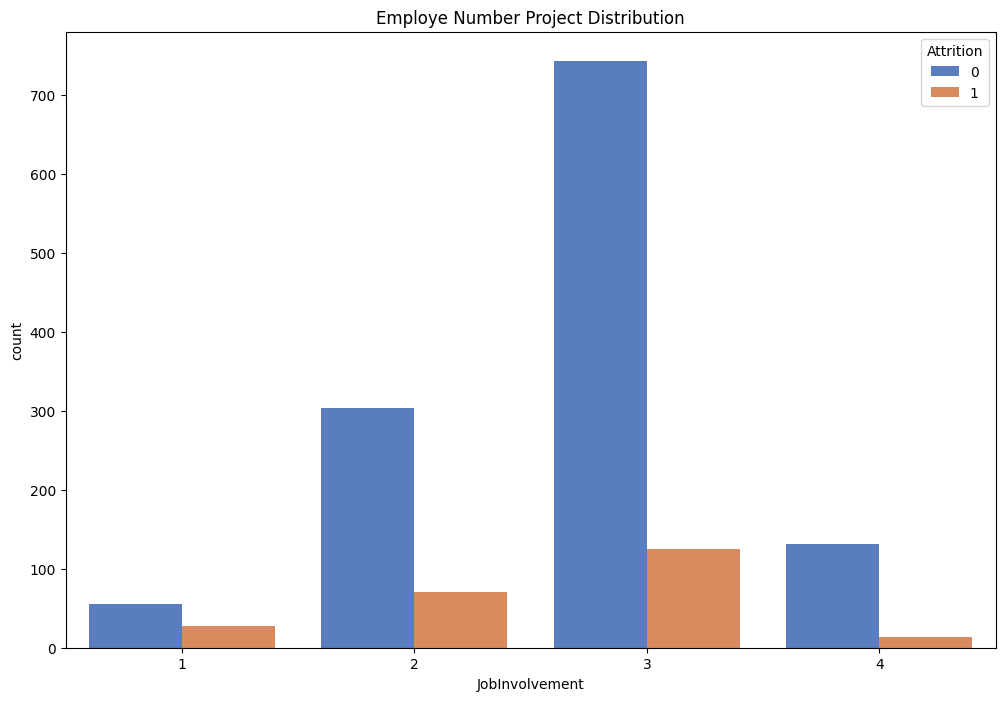

In [58]:
# number of project worked vs left

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df_turnover).set_title('Employe Number Project Distribution')
plt.show()

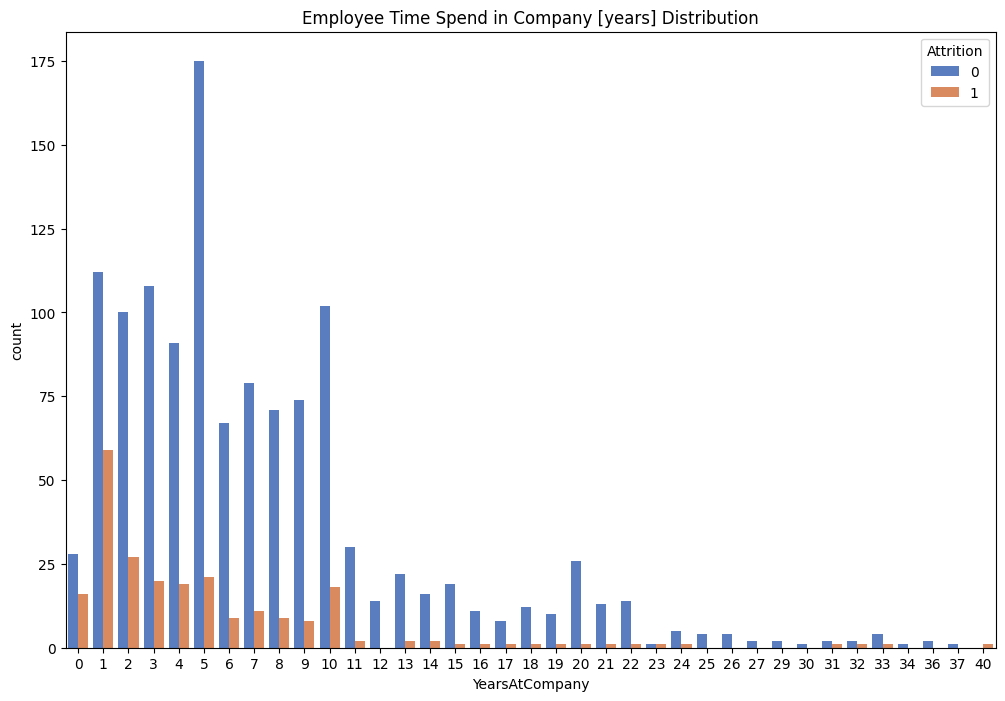

In [59]:
# time spend at company vs left

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df_turnover).set_title('Employee Time Spend in Company [years] Distribution')
plt.show()

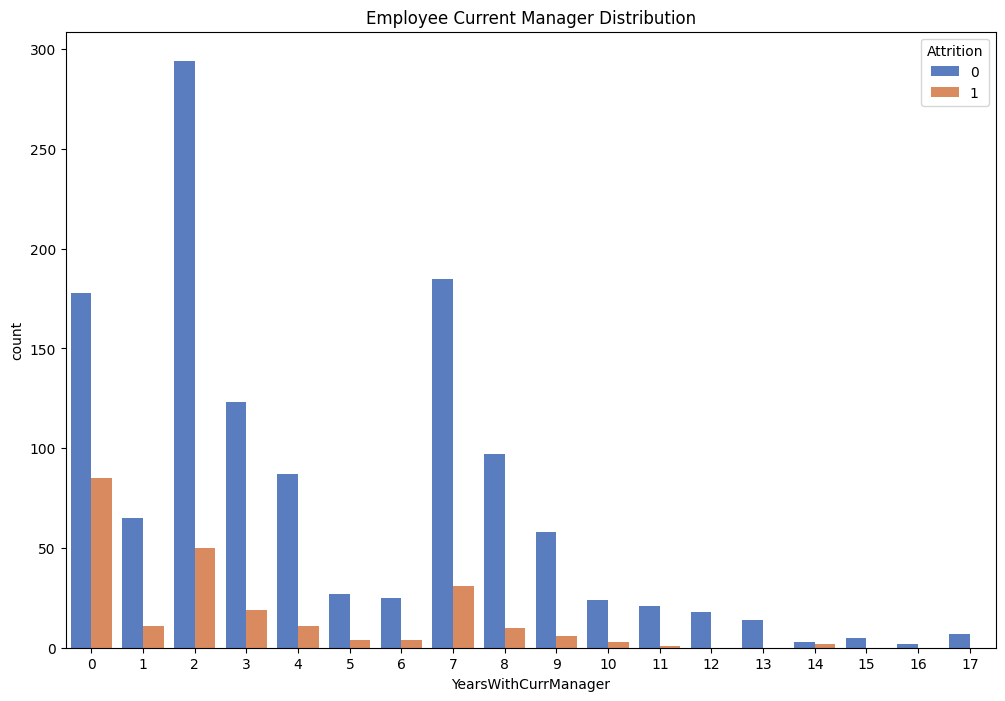

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df_turnover).set_title('Employee Current Manager Distribution')
plt.show()

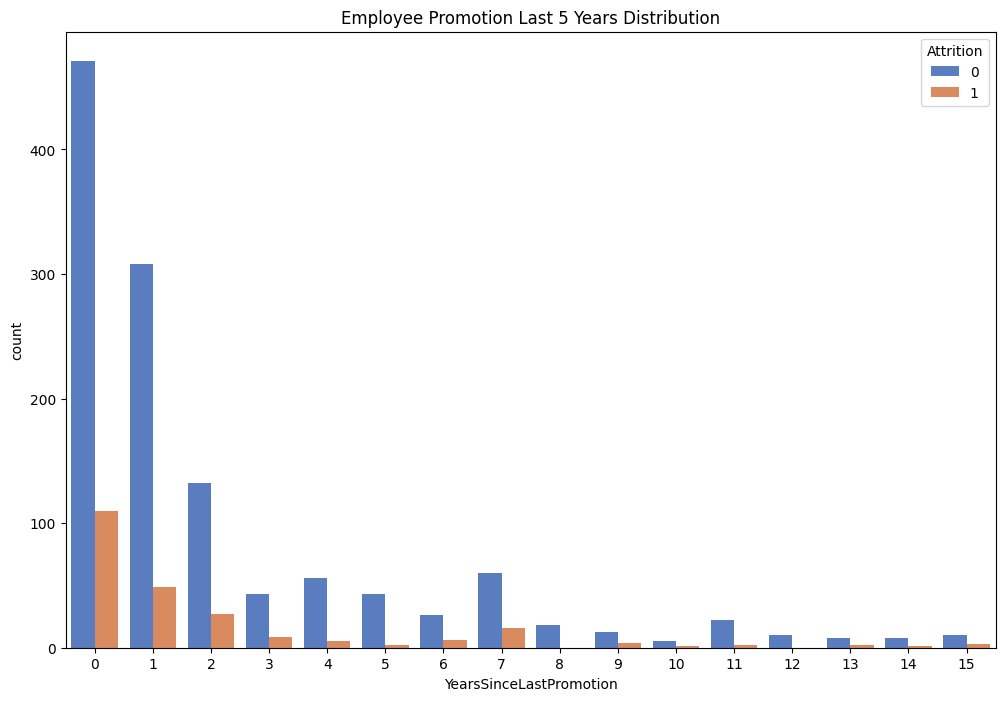

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df_turnover).set_title('Employee Promotion Last 5 Years Distribution')
plt.show()

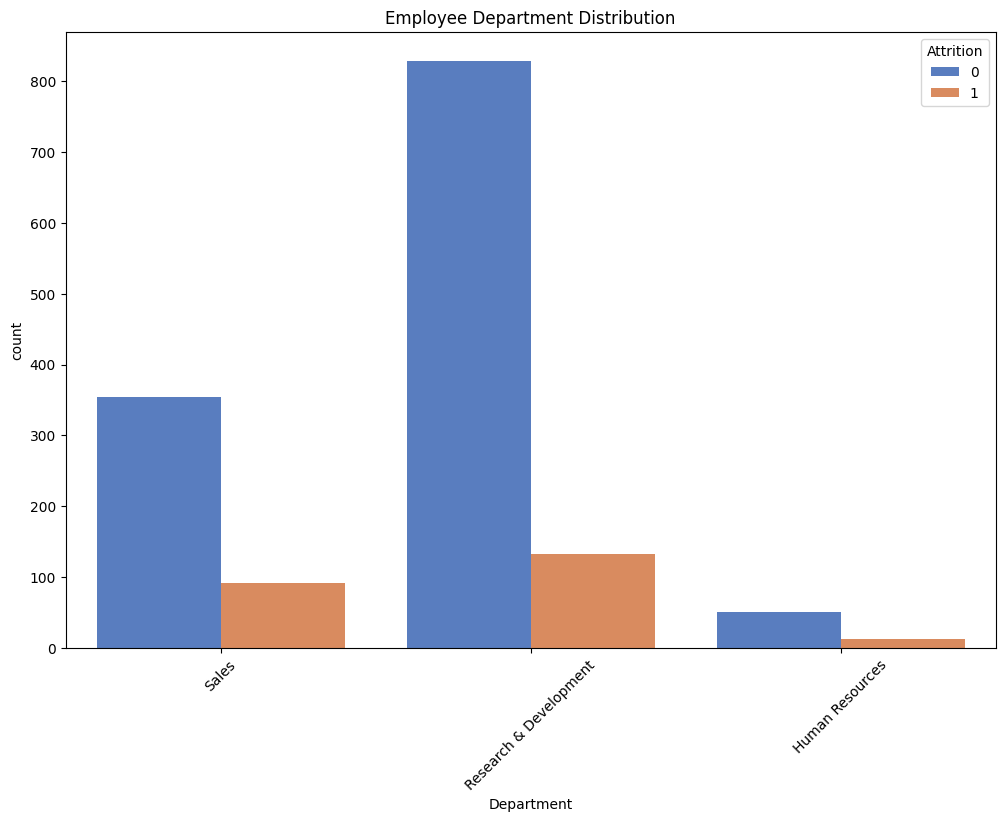

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Department', hue='Attrition', data=df_turnover).set_title('Employee Department Distribution')
plt.xticks(rotation=45)
plt.show()

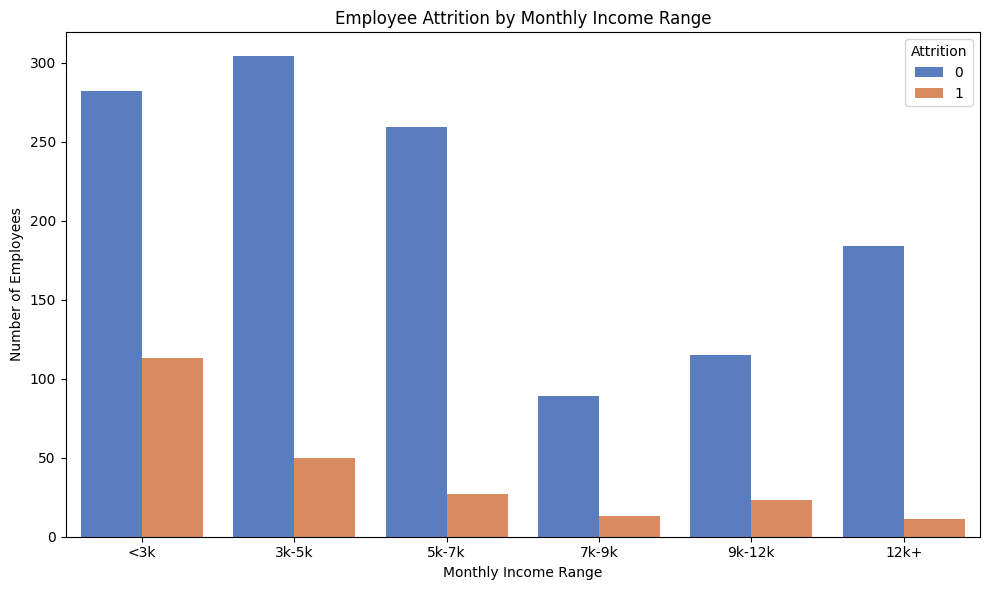

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Create salary bins
bins = [0, 3000, 5000, 7000, 9000, 12000, df_turnover['MonthlyIncome'].max()]
labels = ['<3k', '3k-5k', '5k-7k', '7k-9k', '9k-12k', '12k+']
df_turnover['IncomeRange'] = pd.cut(df_turnover['MonthlyIncome'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='IncomeRange', hue='Attrition', data=df_turnover)
plt.title('Employee Attrition by Monthly Income Range')
plt.xlabel('Monthly Income Range')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


In [64]:
df_turnover.head(20)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeRange
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,5k-7k
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,5k-7k
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,<3k
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,<3k
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,3k-5k
5,0,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,3k-5k
6,0,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,<3k
7,0,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,<3k
8,0,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,9k-12k
9,0,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,5k-7k


Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Rows after encoding categorical columns: 1470


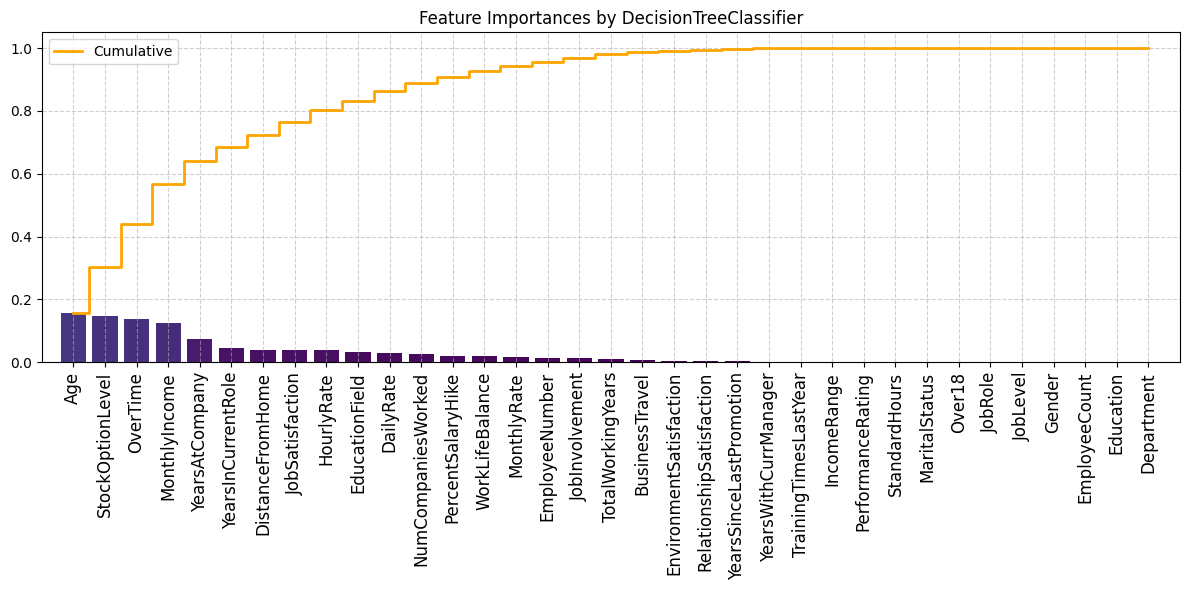

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example: df_turnover = pd.read_csv("your_data.csv")
# Make sure df_turnover is properly loaded before running the rest

print("Initial rows:", len(df_turnover))

# Rename target column
df_turnover = df_turnover.rename(columns={'Attrition': 'turnover'})

# Drop rows with any missing values
df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

# If your target is already integer 0/1, no mapping needed
# Just ensure target is integer type and contains 2 classes
print("Target value counts:\n", df_turnover['turnover'].value_counts())

if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns if any remain as object/categorical
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

print("Rows after encoding categorical columns:", len(df_turnover))

# Define features and target
target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train Decision Tree classifier
dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)

# Feature importances
importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances by DecisionTreeClassifier")
bars = plt.bar(range(len(indices)), importances[indices], align="center", color=plt.cm.viridis(importances[indices]))
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative', color='orange', linewidth=2)
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=12)
plt.xlim([-1, len(indices)])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Rows after encoding categorical columns: 1470


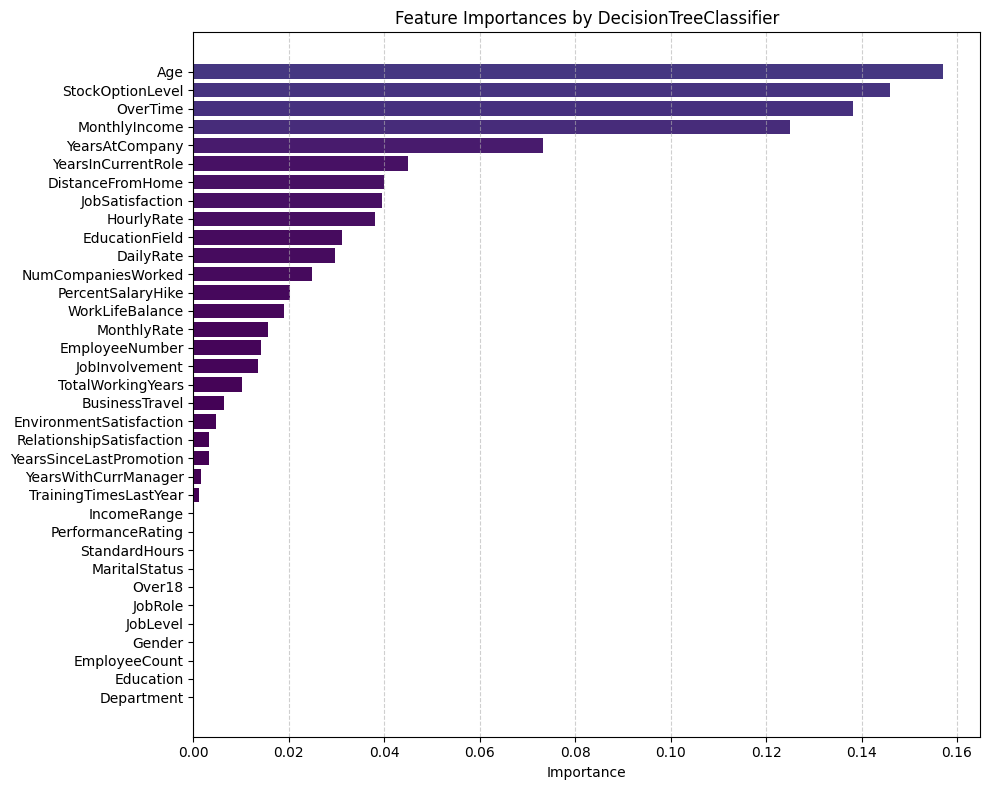

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example: df_turnover = pd.read_csv("your_data.csv")
# Make sure df_turnover is properly loaded before running the rest

print("Initial rows:", len(df_turnover))

# Rename target column
df_turnover = df_turnover.rename(columns={'Attrition': 'turnover'})

# Drop rows with any missing values
df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

# If your target is already integer 0/1, no mapping needed
# Just ensure target is integer type and contains 2 classes
print("Target value counts:\n", df_turnover['turnover'].value_counts())

if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns if any remain as object/categorical
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

print("Rows after encoding categorical columns:", len(df_turnover))

# Define features and target
target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train Decision Tree classifier
dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)

# Feature importances
importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances by DecisionTreeClassifier")

# Horizontal bars sorted descending
plt.barh(range(len(indices)), importances[indices], color=plt.cm.viridis(importances[indices]))
plt.yticks(range(len(indices)), feat_names[indices])
plt.gca().invert_yaxis()  # highest importance on top
plt.xlabel("Importance")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Rows after encoding categorical columns: 1470


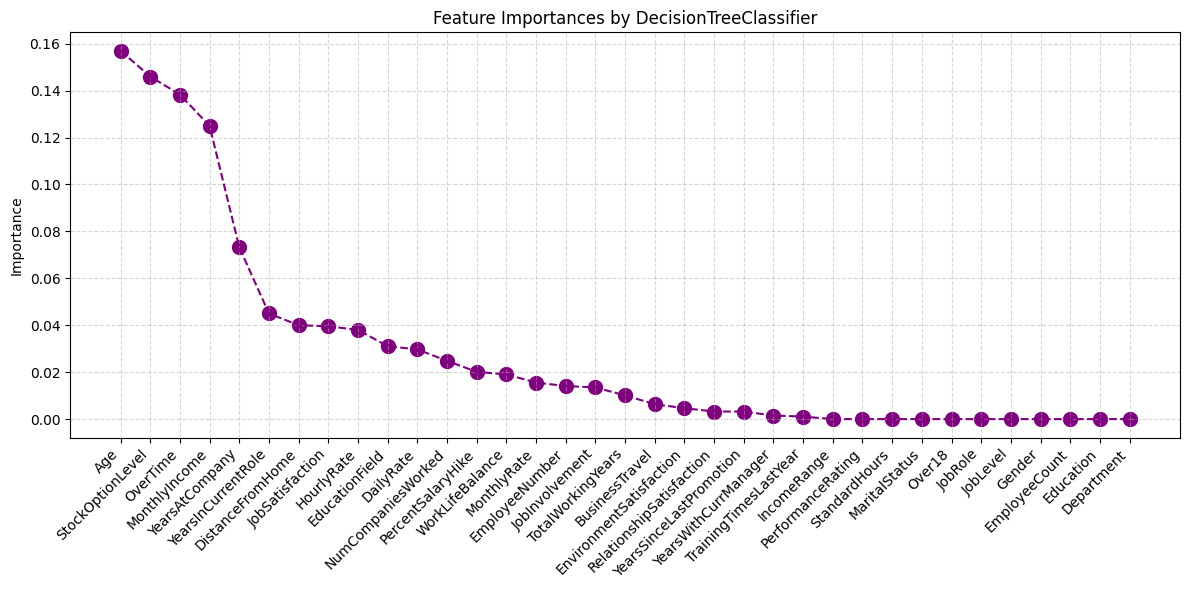

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example: df_turnover = pd.read_csv("your_data.csv")
# Make sure df_turnover is properly loaded before running the rest

print("Initial rows:", len(df_turnover))

# Rename target column
df_turnover = df_turnover.rename(columns={'Attrition': 'turnover'})

# Drop rows with any missing values
df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

# If your target is already integer 0/1, no mapping needed
# Just ensure target is integer type and contains 2 classes
print("Target value counts:\n", df_turnover['turnover'].value_counts())

if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns if any remain as object/categorical
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

print("Rows after encoding categorical columns:", len(df_turnover))

# Define features and target
target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train Decision Tree classifier
dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)

# Feature importances
importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances by DecisionTreeClassifier")

sorted_importances = importances[indices]
plt.scatter(range(len(indices)), sorted_importances, color='purple', s=100)
plt.plot(range(len(indices)), sorted_importances, color='purple', linestyle='--')

plt.xticks(range(len(indices)), feat_names[indices], rotation=45, ha='right')
plt.ylabel("Importance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Rows after encoding categorical columns: 1470


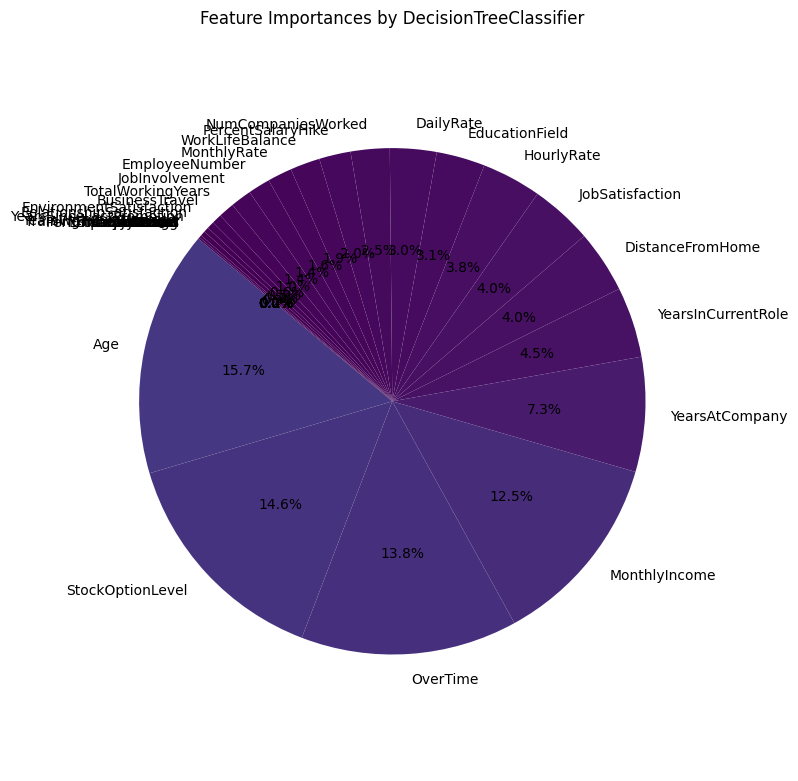

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example: df_turnover = pd.read_csv("your_data.csv")
# Make sure df_turnover is properly loaded before running the rest

print("Initial rows:", len(df_turnover))

# Rename target column
df_turnover = df_turnover.rename(columns={'Attrition': 'turnover'})

# Drop rows with any missing values
df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

# If your target is already integer 0/1, no mapping needed
# Just ensure target is integer type and contains 2 classes
print("Target value counts:\n", df_turnover['turnover'].value_counts())

if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns if any remain as object/categorical
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

print("Rows after encoding categorical columns:", len(df_turnover))

# Define features and target
target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train Decision Tree classifier
dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)

# Feature importances
importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 8))
plt.title("Feature Importances by DecisionTreeClassifier")

plt.pie(importances[indices], labels=feat_names[indices], autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(importances[indices]))
plt.axis('equal')  # Equal aspect ratio to ensure pie is circular
plt.tight_layout()
plt.show()


Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Rows after encoding categorical columns: 1470


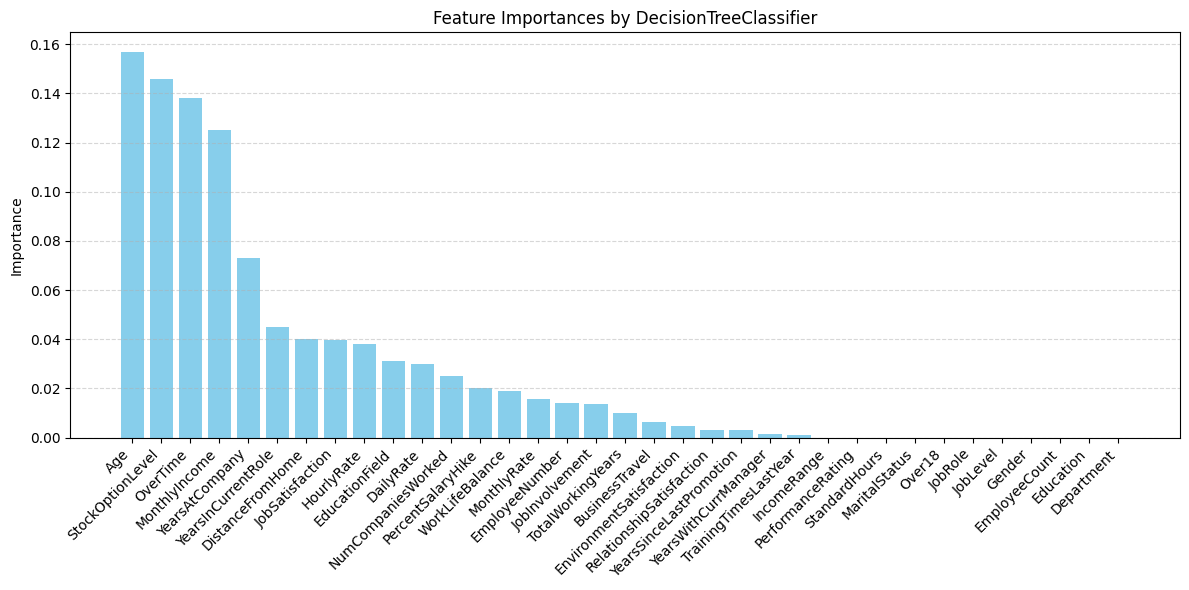

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example: df_turnover = pd.read_csv("your_data.csv")
# Make sure df_turnover is properly loaded before running the rest

print("Initial rows:", len(df_turnover))

# Rename target column
df_turnover = df_turnover.rename(columns={'Attrition': 'turnover'})

# Drop rows with any missing values
df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

# If your target is already integer 0/1, no mapping needed
# Just ensure target is integer type and contains 2 classes
print("Target value counts:\n", df_turnover['turnover'].value_counts())

if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns if any remain as object/categorical
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

print("Rows after encoding categorical columns:", len(df_turnover))

# Define features and target
target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train Decision Tree classifier
dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)

# Feature importances
importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances by DecisionTreeClassifier")

plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation=45, ha='right')
plt.ylabel("Importance")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


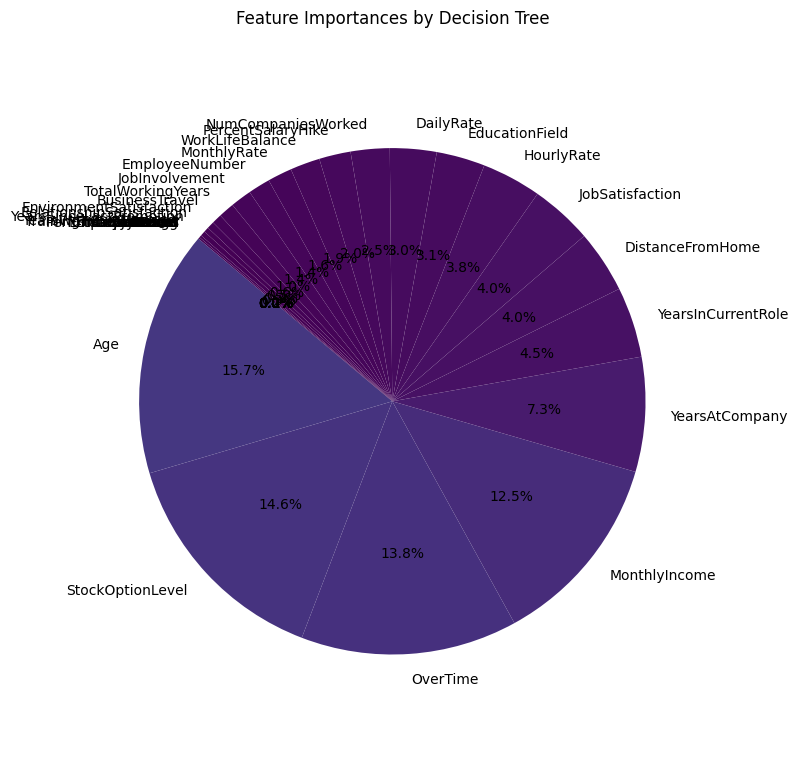

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example:
# df_turnover = pd.read_csv("your_data.csv")

# Rename target column
df_turnover.rename(columns={'Attrition': 'turnover'}, inplace=True)

# Drop rows with missing values
df_turnover.dropna(inplace=True)

# Check target classes and ensure integer type
if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")
df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns (if any remain)
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

# Define features and target
target = 'turnover'
X = df_turnover.drop(columns=target)
y = df_turnover[target]

# Split dataset (85% train, 15% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train decision tree classifier
dtree = DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)

# Feature importances sorted descending
importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot pie chart of feature importances
plt.figure(figsize=(8, 8))
plt.title("Feature Importances by Decision Tree")
plt.pie(
    importances[indices],
    labels=feat_names[indices],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis(importances[indices])
)
plt.axis('equal')  # Circle aspect ratio
plt.tight_layout()
plt.show()


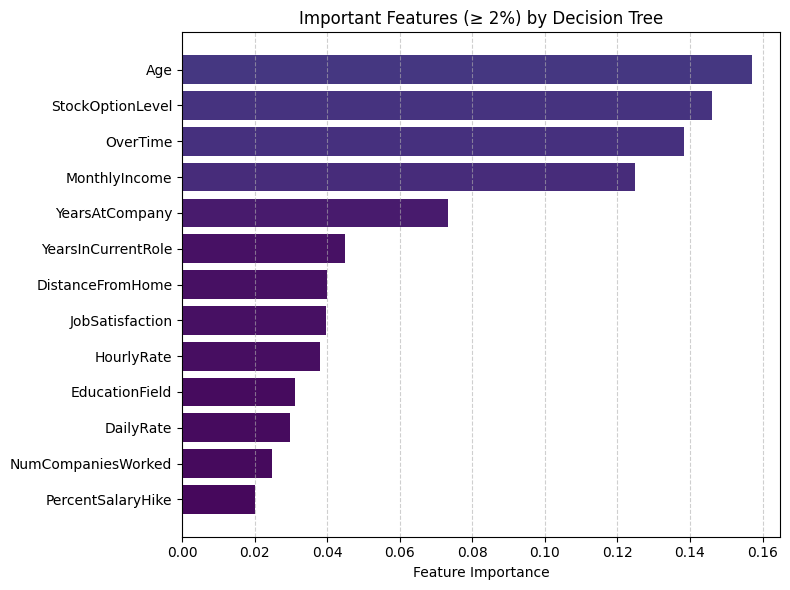

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example:
# df_turnover = pd.read_csv("your_data.csv")

# Rename target column and drop missing
df_turnover.rename(columns={'Attrition': 'turnover'}, inplace=True)
df_turnover.dropna(inplace=True)

# Ensure target is integer with 2 classes
if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")
df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

# Define features and target
X = df_turnover.drop(columns='turnover')
y = df_turnover['turnover']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train Decision Tree
dtree = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01, random_state=42)
dtree.fit(X_train, y_train)

# Get feature importances
importances = dtree.feature_importances_
feat_names = X.columns

# Filter features with importance >= 2%
threshold = 0.02
mask = importances >= threshold

filtered_importances = importances[mask]
filtered_feat_names = feat_names[mask]

# Sort descending
indices = np.argsort(filtered_importances)[::-1]
filtered_importances = filtered_importances[indices]
filtered_feat_names = filtered_feat_names[indices]

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(range(len(filtered_importances)), filtered_importances, color=plt.cm.viridis(filtered_importances))
plt.yticks(range(len(filtered_feat_names)), filtered_feat_names)
plt.xlabel('Feature Importance')
plt.title('Important Features (≥ 2%) by Decision Tree')
plt.gca().invert_yaxis()  # highest importance at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


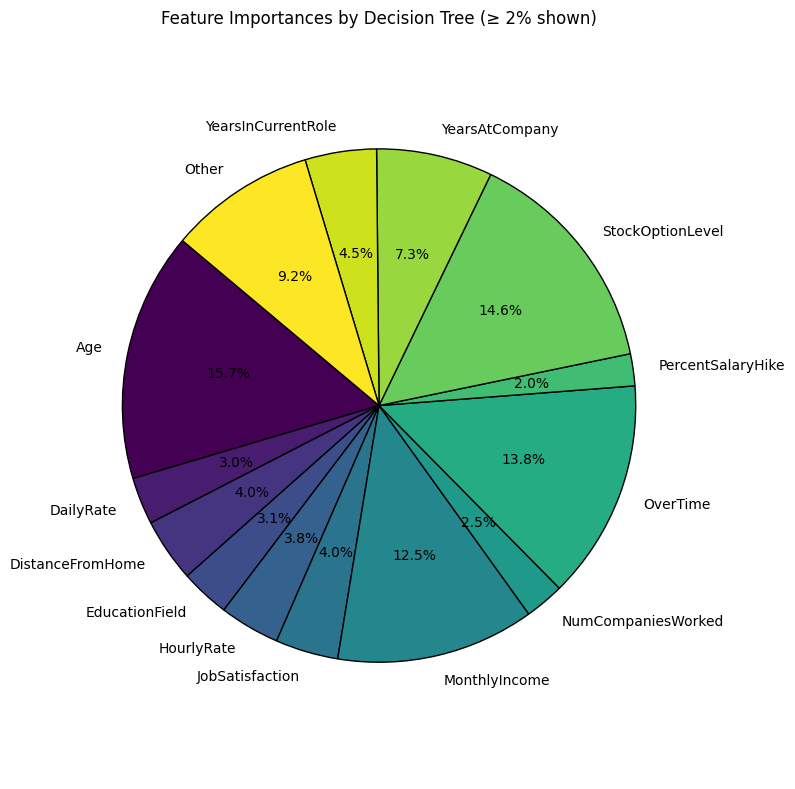

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example:
# df_turnover = pd.read_csv("your_data.csv")

# Rename target column and drop missing
df_turnover.rename(columns={'Attrition': 'turnover'}, inplace=True)
df_turnover.dropna(inplace=True)

# Ensure target is integer with 2 classes
if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")
df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

# Define features and target
X = df_turnover.drop(columns='turnover')
y = df_turnover['turnover']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Train Decision Tree
dtree = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01, random_state=42)
dtree.fit(X_train, y_train)

# Get feature importances
importances = dtree.feature_importances_
feat_names = X.columns

# Threshold to filter small importances (e.g., 2%)
threshold = 0.02

# Separate large and small importances
large_mask = importances >= threshold
small_mask = ~large_mask

large_importances = importances[large_mask]
large_names = feat_names[large_mask]

small_importances = importances[small_mask]

# Sum of small importances to group into 'Other'
other_importance = small_importances.sum()

# Combine large features + 'Other' if applicable
final_importances = np.append(large_importances, other_importance) if other_importance > 0 else large_importances
final_labels = list(large_names)
if other_importance > 0:
    final_labels.append('Other')

# Colors for pie (viridis colormap scaled to number of slices)
colors = plt.cm.viridis(np.linspace(0, 1, len(final_importances)))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.title("Feature Importances by Decision Tree (≥ 2% shown)")
plt.pie(
    final_importances,
    labels=final_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'k'}
)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()


Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Rows after encoding categorical columns: 1470


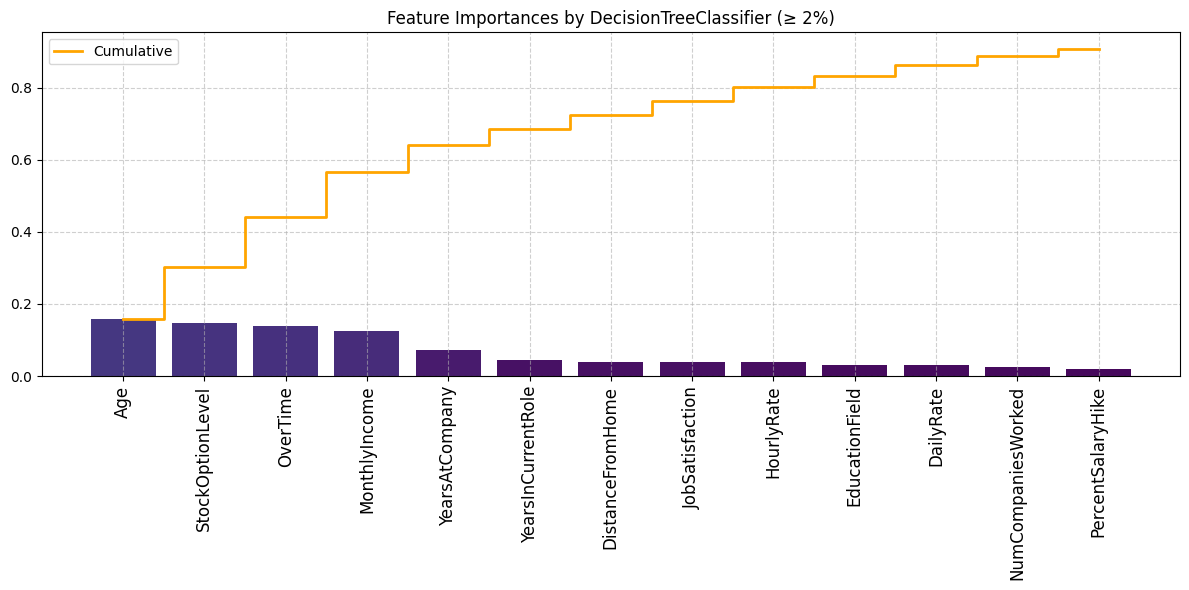

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# --- Load your data here ---
# Example: df_turnover = pd.read_csv("your_data.csv")

print("Initial rows:", len(df_turnover))

df_turnover = df_turnover.rename(columns={'Attrition': 'turnover'})
df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

print("Target value counts:\n", df_turnover['turnover'].value_counts())

if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

print("Rows after encoding categorical columns:", len(df_turnover))

target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)

importances = dtree.feature_importances_
feat_names = X.columns

# Filter by threshold (e.g., keep importances >= 0.02)
threshold = 0.02
mask = importances >= threshold

filtered_importances = importances[mask]
filtered_feat_names = feat_names[mask]

# Sort descending for plotting
indices = np.argsort(filtered_importances)[::-1]
sorted_importances = filtered_importances[indices]
sorted_feat_names = filtered_feat_names[indices]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances by DecisionTreeClassifier (≥ 2%)")

bars = plt.bar(range(len(sorted_importances)), sorted_importances,
               align="center", color=plt.cm.viridis(sorted_importances))

plt.step(range(len(sorted_importances)), np.cumsum(sorted_importances),
         where='mid', label='Cumulative', color='orange', linewidth=2)

plt.xticks(range(len(sorted_importances)), sorted_feat_names, rotation='vertical', fontsize=12)
plt.xlim([-1, len(sorted_importances)])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Accuracy Score: 0.8868778280542986

Confusion Matrix:
 [[174  11]
 [ 14  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       185
           1       0.67      0.61      0.64        36

    accuracy                           0.89       221
   macro avg       0.80      0.78      0.79       221
weighted avg       0.88      0.89      0.88       221



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:29:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1200x800 with 0 Axes>

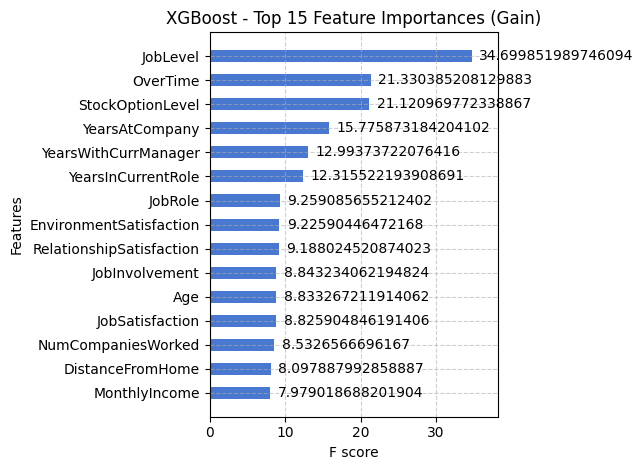

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load or prepare your DataFrame: df_turnover
# Make sure df_turnover has 'turnover' as target column

print("Initial rows:", len(df_turnover))

# Drop rows with missing values
df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

# Check if target column 'turnover' exists
if 'turnover' not in df_turnover.columns:
    raise KeyError("Target column 'turnover' not found in DataFrame")

# Display target counts
print("Target value counts:\n", df_turnover['turnover'].value_counts())

# Check for at least 2 classes
if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

# Encode categorical columns
for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

# Define features and target
target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

# Split dataset (15% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

# Define and train XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance without cmap
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=15, importance_type='gain', height=0.5)
plt.title("XGBoost - Top 15 Feature Importances (Gain)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


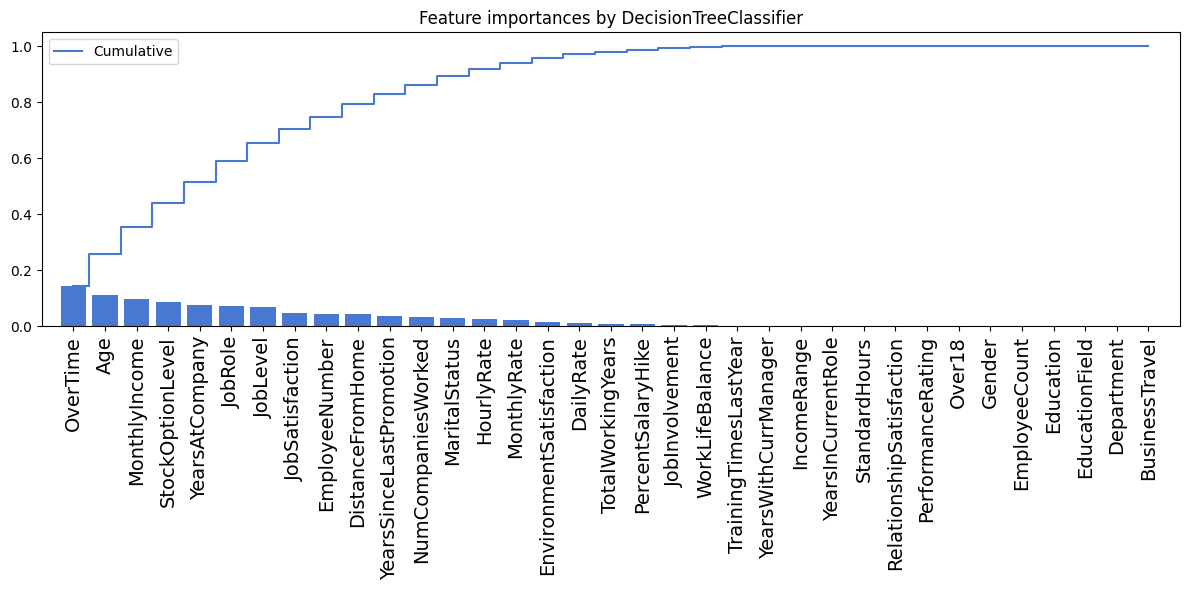

Model Evaluation on Test Set
Accuracy Score     : 0.7619
Precision Score    : 0.3544
Recall Score       : 0.5957
F1 Score           : 0.4444

Confusion Matrix:
[[196  51]
 [ 19  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       247
           1       0.35      0.60      0.44        47

    accuracy                           0.76       294
   macro avg       0.63      0.69      0.65       294
weighted avg       0.82      0.76      0.78       294



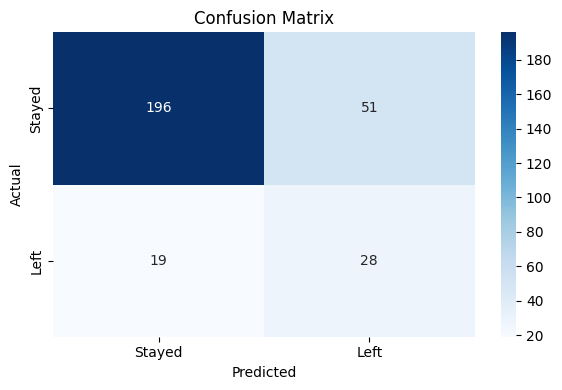

In [75]:
#testing bobby

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Rename 'left' column to 'turnover'
df_turnover = df_turnover.rename(columns={'left': 'turnover'})

# Convert categorical variables to numeric codes
df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

# Define features and target
target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123, stratify=y
)

# Train Decision Tree Classifier
dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
)
dtree = dtree.fit(X_train, y_train)

# Feature importance plot
importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=14)
plt.xlim([-1, len(indices)])
plt.legend()
plt.tight_layout()
plt.show()

# Predict on test set
y_pred = dtree.predict(X_test)

# Evaluation metrics
print("Model Evaluation on Test Set")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


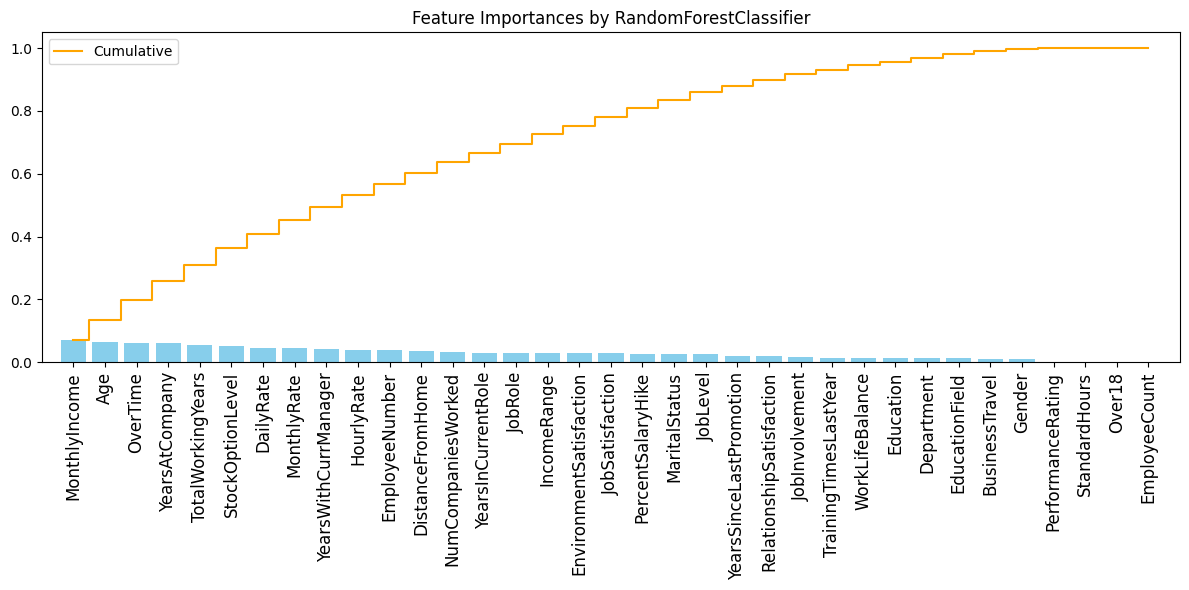

Model Evaluation on Test Set
Accuracy Score     : 0.8469
Precision Score    : 0.5333
Recall Score       : 0.3404
F1 Score           : 0.4156

Confusion Matrix:
[[233  14]
 [ 31  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.53      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.71      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294



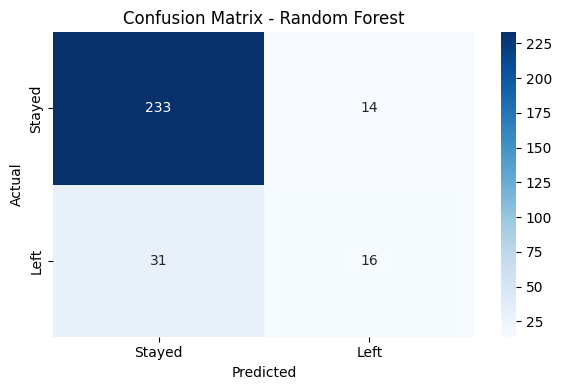

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Sample load (ensure your df_turnover is loaded correctly)
# df_turnover = pd.read_csv("your_file.csv")

# Rename 'left' column to 'turnover'
df_turnover = df_turnover.rename(columns={'left': 'turnover'})

# Convert categorical variables to numeric codes
df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

# Define features and target
target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123, stratify=y
)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    min_samples_leaf=5,
    random_state=123
)
rf_model.fit(X_train, y_train)

# Feature importance plot
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances by RandomForestClassifier")
plt.bar(range(len(indices)), importances[indices], align="center", color='skyblue')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative', color='orange')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=12)
plt.xlim([-1, len(indices)])
plt.legend()
plt.tight_layout()
plt.show()

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print("Model Evaluation on Test Set")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation on Test Set (Voting Classifier Ensemble)
Accuracy Score     : 0.8027
Precision Score    : 0.4098
Recall Score       : 0.5319
F1 Score           : 0.4630

Confusion Matrix:
[[211  36]
 [ 22  25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       247
           1       0.41      0.53      0.46        47

    accuracy                           0.80       294
   macro avg       0.66      0.69      0.67       294
weighted avg       0.83      0.80      0.81       294



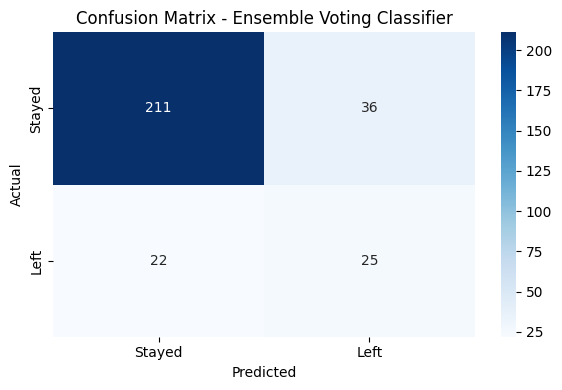

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Load your DataFrame (make sure df_turnover is loaded)
# df_turnover = pd.read_csv("your_file.csv")

# Rename 'left' column to 'turnover'
df_turnover = df_turnover.rename(columns={'left': 'turnover'})

# Convert categorical variables to numeric codes
df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

# Define features and target
target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123, stratify=y
)

# Define base models
clf_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', min_samples_leaf=5, random_state=123)
clf_dt = DecisionTreeClassifier(class_weight="balanced", min_samples_leaf=5, random_state=123)
clf_lr = LogisticRegression(max_iter=1000, class_weight="balanced", solver='lbfgs')

# Create Voting Classifier (ensemble)
ensemble_model = VotingClassifier(
    estimators=[
        ('RandomForest', clf_rf),
        ('DecisionTree', clf_dt),
        ('LogisticRegression', clf_lr)
    ],
    voting='hard'  # You can change to 'soft' if using probabilistic voting
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on test set
y_pred = ensemble_model.predict(X_test)

# Evaluation metrics
print("Model Evaluation on Test Set (Voting Classifier Ensemble)")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Ensemble Voting Classifier')
plt.tight_layout()
plt.show()


Model Evaluation on Test Set (Voting Classifier Ensemble)
Accuracy Score     : 0.8299
Precision Score    : 0.4746
Recall Score       : 0.5957
F1 Score           : 0.5283

Confusion Matrix:
[[216  31]
 [ 19  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       247
           1       0.47      0.60      0.53        47

    accuracy                           0.83       294
   macro avg       0.70      0.74      0.71       294
weighted avg       0.85      0.83      0.84       294



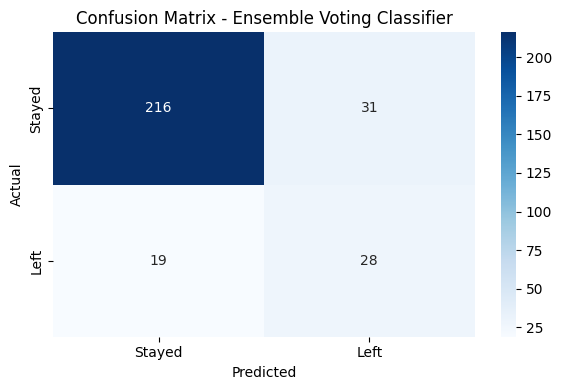

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Load your DataFrame (make sure df_turnover is loaded)
# df_turnover = pd.read_csv("your_file.csv")

# Rename 'left' column to 'turnover'
df_turnover = df_turnover.rename(columns={'left': 'turnover'})

# Convert categorical variables to numeric codes
df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

# Define features and target
target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

# Standardize features (important for LogisticRegression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=123, stratify=y
)

# Define base models
clf_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', min_samples_leaf=5, random_state=123)
clf_dt = DecisionTreeClassifier(class_weight="balanced", min_samples_leaf=5, random_state=123)
clf_lr = LogisticRegression(max_iter=5000, class_weight="balanced", solver='lbfgs')

# Create Voting Classifier (ensemble)
ensemble_model = VotingClassifier(
    estimators=[
        ('RandomForest', clf_rf),
        ('DecisionTree', clf_dt),
        ('LogisticRegression', clf_lr)
    ],
    voting='hard'  # 'soft' voting can be used if you want probability averaging
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on test set
y_pred = ensemble_model.predict(X_test)

# Evaluation metrics
print("Model Evaluation on Test Set (Voting Classifier Ensemble)")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Ensemble Voting Classifier')
plt.tight_layout()
plt.show()


Model Evaluation on Test Set (Voting Classifier Ensemble)
Accuracy Score     : 0.8299
Precision Score    : 0.4746
Recall Score       : 0.5957
F1 Score           : 0.5283

Confusion Matrix:
[[216  31]
 [ 19  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       247
           1       0.47      0.60      0.53        47

    accuracy                           0.83       294
   macro avg       0.70      0.74      0.71       294
weighted avg       0.85      0.83      0.84       294



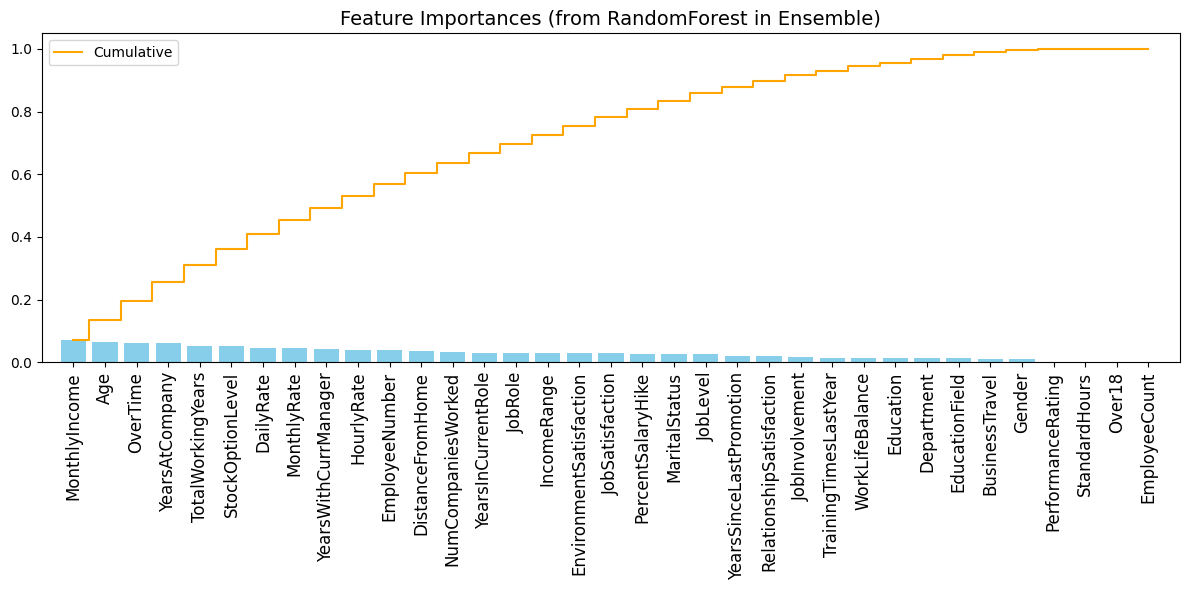

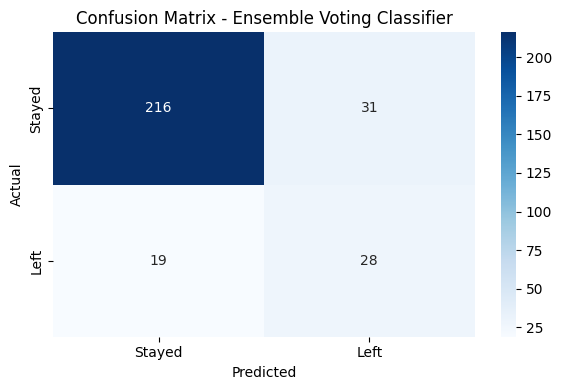

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Load your DataFrame (replace with actual data loading if needed)
# df_turnover = pd.read_csv("your_file.csv")

# Rename 'left' column to 'turnover'
df_turnover = df_turnover.rename(columns={'left': 'turnover'})

# Convert categorical variables to numeric codes
df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

# Define features and target
target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

# Standardize features (important for LogisticRegression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=123, stratify=y
)

# Define base models
clf_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', min_samples_leaf=5, random_state=123)
clf_dt = DecisionTreeClassifier(class_weight="balanced", min_samples_leaf=5, random_state=123)
clf_lr = LogisticRegression(max_iter=5000, class_weight="balanced", solver='lbfgs')

# Create Voting Classifier (ensemble)
ensemble_model = VotingClassifier(
    estimators=[
        ('RandomForest', clf_rf),
        ('DecisionTree', clf_dt),
        ('LogisticRegression', clf_lr)
    ],
    voting='hard'
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on test set
y_pred = ensemble_model.predict(X_test)

# Evaluation metrics
print("Model Evaluation on Test Set (Voting Classifier Ensemble)")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance from the fitted Random Forest inside the ensemble
fitted_rf = ensemble_model.named_estimators_['RandomForest']
importances = fitted_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (from RandomForest in Ensemble)", fontsize=14)
plt.bar(range(len(indices)), importances[indices], align="center", color='skyblue')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative', color='orange')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=12)
plt.xlim([-1, len(indices)])
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Ensemble Voting Classifier')
plt.tight_layout()
plt.show()


Model Evaluation on Test Set (Logistic Regression)
Accuracy Score     : 0.7551
Precision Score    : 0.3684
Recall Score       : 0.7447
F1 Score           : 0.4930

Confusion Matrix:
[[187  60]
 [ 12  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       247
           1       0.37      0.74      0.49        47

    accuracy                           0.76       294
   macro avg       0.65      0.75      0.67       294
weighted avg       0.85      0.76      0.78       294



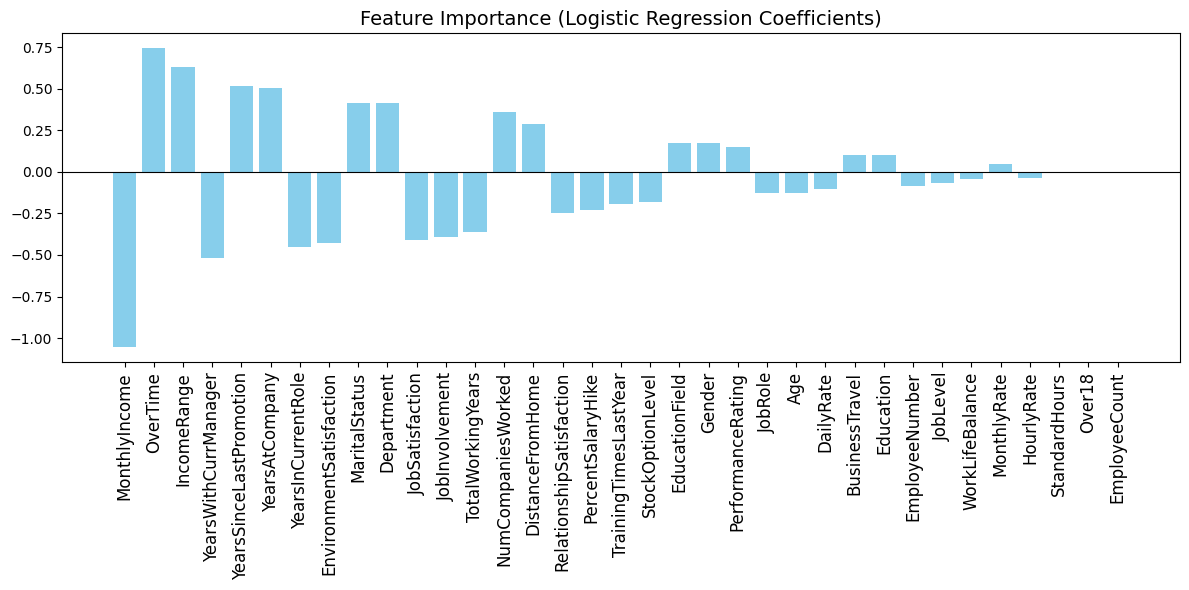

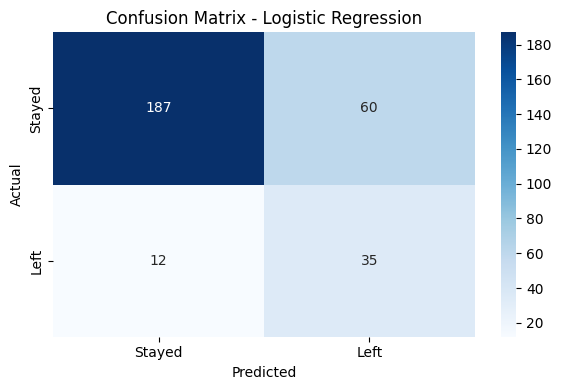

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Load your DataFrame (replace with actual load if needed)
# df_turnover = pd.read_csv("your_file.csv")

# Rename 'left' column to 'turnover'
df_turnover = df_turnover.rename(columns={'left': 'turnover'})

# Convert categorical variables to numeric codes
df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

# Define features and target
target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=123, stratify=y
)

# Train Logistic Regression Classifier
clf_lr = LogisticRegression(max_iter=5000, class_weight="balanced", solver='lbfgs')
clf_lr.fit(X_train, y_train)

# Predict on test set
y_pred = clf_lr.predict(X_test)

# Evaluation metrics
print("Model Evaluation on Test Set (Logistic Regression)")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance (Logistic Regression Coefficients)
coefficients = clf_lr.coef_[0]
feat_names = X.columns
indices = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Logistic Regression Coefficients)", fontsize=14)
bars = plt.bar(range(len(indices)), coefficients[indices], align="center", color='skyblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()
